In [24]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import flowio
import flowutils

In [6]:
!head /media/clint/Data/GitRepo/Data_FlowHIV/100715.fcs

FCS2.0          58    5099    5120 4166143       0       0\$TOT\65016\$PAR\16\$MODE\L\$BYTEORD\4,3,2,1\$FIL\100715.fcs\$NEXTDATA\0\$DATATYPE\F\$BEGINSTEXT\0\$BTIM\15:36:28\$CYT\Main Aria (FACSAria)\$DATE\17-JUL-2007\$ENDSTEXT\0\$ETIM\15:38:06\$INST\ \$OP\Administrator\$SRC\Specimen_001\$SYS\Windows XP 5.1\$TIMESTEP\0.08\APPLY COMPENSATION\TRUE\AUTOBS\TRUE\CD Age\19.6\CD CD4, %CM\.\CD CD4, %EM\.\CD CD4, %N\.\CD CD4, %TM\.\CD Event Censor\0\CD First Viral Load\2024\CD First Viral Load Date\11/09/1999\CD Gag/100 CD4 Cells\.\CD Gag/100 CM Cells\.\CD Gag/100 EM Cells\.\CD Gag/100 N Cells\.\CD GAG/100 TM CELLS\.\CD Seroconversion Datae\04/30/1999\CD Survival time from seroconversion\63\CD Time from seroc to sample\194\CYTNUM\1\EXPERIMENT NAME\070717_AB02_tb\EXPORT TIME\17-JUL-2007-16:04:38\EXPORT USER NAME\Administrator\Final Pin\100715\FJ_$P17R\262144\FJ_$TIMESTEP\0.01\FJ_CompMatrixName\ \FSC ASF\0.63\GUID\0d8e743a-05fe-4e8b-9ec4-25993c124ee2\Index\416\LASER1ASF\0.66\LASER1DELAY\0.00\LASER1

# Import flow data using flowio

In [8]:
fd = flowio.FlowData("/media/clint/Data/GitRepo/Data_FlowHIV/100715.fcs")
fd

100715.fcs

In [9]:
print(fd.channels)

{u'11': {'PnS': u'VIVID / CD14', 'PnN': u'V450-A'}, u'10': {'PnS': u'CD57', 'PnN': u'V585-A'}, u'13': {'PnS': u'CD19', 'PnN': u'G710-A'}, u'12': {'PnS': u'CCR5', 'PnN': u'G780-A'}, u'15': {'PnS': u'CCR7', 'PnN': u'G610-A'}, u'14': {'PnS': u'CD27', 'PnN': u'G660-A'}, u'16': {'PnS': u'CD127', 'PnN': u'G560-A'}, u'1': {'PnS': u' ', 'PnN': u'FSC-A'}, u'3': {'PnS': u' ', 'PnN': u'SSC-A'}, u'2': {'PnS': u' ', 'PnN': u'FSC-H'}, u'5': {'PnS': u'CD3', 'PnN': u'R780-A'}, u'4': {'PnS': u'KI67', 'PnN': u'B515-A'}, u'7': {'PnS': u'CD45RO', 'PnN': u'R660-A'}, u'6': {'PnS': u'CD28', 'PnN': u'R710-A'}, u'9': {'PnS': u'CD4', 'PnN': u'V655-A'}, u'8': {'PnS': u'CD8', 'PnN': u'V800-A'}}


PnN -> Pn1, Pn2, Pn3, .... This is the required  
PnN will be the fluorescent color / molecular  
The rest of them are optional, often the PnS will be the markers name  

For example: 'PnS': u'VIVID / CD14', 'PnN': u'V450-A'
- V450-A
    - v450 fluorochrome
    - A --- Area
- the molecule measured: CD14

# reshape the read-in FlowData object

https://github.com/whitews/FlowIO/blob/master/examples/reshape_events.py

In [12]:
# numbers of cells
len(fd.events)

1040256

In [16]:
#f = flowio.FlowData('001_F6901PRY_21_C1_C01.fcs')
#n = numpy.reshape(f.events, (-1, f.channel_count))
n = np.reshape(fd.events, (-1, fd.channel_count))

In [17]:
n.shape

(65016, 16)

In [18]:
n.shape[0] * n.shape[1]

1040256

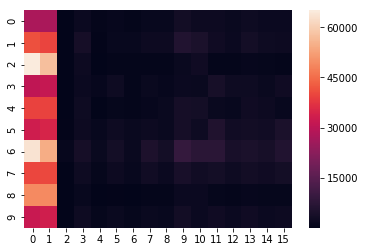

In [26]:
sns.heatmap(n[:10])

# print channels

https://github.com/whitews/FlowIO/blob/master/examples/print_channels.py

In [27]:
import flowio
import os
import sys

In [28]:
print(sys.argv)
print("==========")
print(os.getcwd())

['/home/clint/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/run/user/1000/jupyter/kernel-2fde21a5-2686-4e72-b5b0-8aaffd39f063.json']
/media/clint/Data/GitRepo/BIOS822_FinalProj


In [30]:
flow_dir = "/media/clint/Data/GitRepo/Data_FlowHIV"
files = os.listdir(flow_dir)
print(files)

['158322.fcs', '100715.fcs', '105696.fcs', '108701.fcs', '109025.fcs', '109567.fcs', '110539.fcs', '113548.fcs', '121069.fcs', '122405.fcs', '127225.fcs', '129599.fcs', '129730.fcs', '129869.fcs', '130119.fcs', '132447.fcs', '132769.fcs', '134892.fcs', '140801.fcs', '145618.fcs', '158483.fcs', '159665.fcs', '162173.fcs', '162520.fcs', '166139.fcs', '167250.fcs', '168908.fcs', '171925.fcs', '174274.fcs', '175520.fcs', '179663.fcs', '183861.fcs', '185809.fcs', '191456.fcs', '192432.fcs', '193061.fcs', '193927.fcs', '198029.fcs', '198775.fcs']


In [31]:
for file in files[:6]: # print six files
    try:
        flow_data = flowio.FlowData("/".join([flow_dir,file]))
    except:
        continue

    print(file + ':')
    for key in sorted(flow_data.channels.keys()):
        line = key + '\t' + \
            flow_data.channels[key]['PnN'] + '\t'
        if 'PnS' in flow_data.channels[key]:
            line += flow_data.channels[key]['PnS']

        print('\t' + line)

    if 'creator' in flow_data.text:
        print('\t' + 'Creator: ' + flow_data.text['creator'])
    if 'export time' in flow_data.text:
        print('\t' + 'Export time: ' + flow_data.text['export time'])
    if 'experiment name' in flow_data.text:
        print('\t' + 'Experiment name: ' + flow_data.text['experiment name'])
    if 'patient id' in flow_data.text:
        print('\t' + 'Patient ID: ' + flow_data.text['patient id']) 
    if 'tube name' in flow_data.text:
        print('\t' + 'Tube name: ' + flow_data.text['tube name'])
    if 'src' in flow_data.text:
        print('\t' + 'Source: ' + flow_data.text['src'])
    if 'sample id' in flow_data.text:
        print('\t' + 'Sample ID: ' + flow_data.text['sample id'])
    if 'tot' in flow_data.text:
        print('\t' + 'Total: ' + flow_data.text['tot'])

158322.fcs:
	1	FSC-A	 
	10	V585-A	CD57
	11	V450-A	VIVID / CD14
	12	G780-A	CCR5
	13	G710-A	CD19
	14	G660-A	CD27
	15	G610-A	CCR7
	16	G560-A	CD127
	2	FSC-H	 
	3	SSC-A	 
	4	B515-A	KI67
	5	R780-A	CD3
	6	R710-A	CD28
	7	R660-A	CD45RO
	8	V800-A	CD8
	9	V655-A	CD4
	Creator: LYSYS
	Export time: 23-AUG-2007-11:16:35
	Experiment name: 070821_AB02_TB
	Tube name: Tube_001
	Source: Specimen_001
	Total: 956052
100715.fcs:
	1	FSC-A	 
	10	V585-A	CD57
	11	V450-A	VIVID / CD14
	12	G780-A	CCR5
	13	G710-A	CD19
	14	G660-A	CD27
	15	G610-A	CCR7
	16	G560-A	CD127
	2	FSC-H	 
	3	SSC-A	 
	4	B515-A	KI67
	5	R780-A	CD3
	6	R710-A	CD28
	7	R660-A	CD45RO
	8	V800-A	CD8
	9	V655-A	CD4
	Creator: LYSYS
	Export time: 17-JUL-2007-16:04:38
	Experiment name: 070717_AB02_tb
	Tube name: Tube_025
	Source: Specimen_001
	Total: 65016
105696.fcs:
	1	FSC-A	 
	10	V585-A	CD57
	11	V450-A	VIVID / CD14
	12	G780-A	CCR5
	13	G710-A	CD19
	14	G660-A	CD27
	15	G610-A	CCR7
	16	G560-A	CD127
	2	FSC-H	 
	3	SSC-A	 
	4	B515-A	KI67
	5	R780-A	CD3
	6	R710-A	CD

# Compensation

fd.text contains the compensation matrix

In [10]:
print(len(fd.events))
print(fd.text)

1040256
{u'p16ms': u'0', u'p1b': u'32', u'cd cd4, %n': u'.', u'p1g': u'1', u'p9r': u'261588', u'p9s': u'CD4', u'laser3delay': u'-24.40', u'p5bs': u'2926', u'p1r': u'262207', u'p1s': u' ', u'p3bs': u'0', u'p16b': u'32', u'threshold': u'FSC,27000', u'p9b': u'32', u'cd gag/100 cd4 cells': u'.', u'p9g': u'1', u'p16bs': u'9808', u'p10bs': u'331', u'p16g': u'1', u'p13display': u'LOG', u'p6bs': u'1162', u'p1bs': u'0', u'p10ms': u'0', u'fil': u'100715.fcs', u'p13bs': u'6053', u'vrc id': u' ', u'p12bs': u'14511', u'p8s': u'CD8', u'p8r': u'261588', u'p11bs': u'0', u'cd survival time from seroconversion': u'63', u'begindata': u'        5120', u'cd first viral load date': u'11/09/1999', u'p1n': u'FSC-A', u'p8b': u'32', u'p8g': u'1', u'enddata': u'     4166143', u'window extension': u'3.00', u'byteord': u'4,3,2,1', u'p11ms': u'0', u'cd seroconversion datae': u'04/30/1999', u'beginstext': u'0', u'p3display': u'LOG', u'p7display': u'LOG', u'p4ms': u'0', u'mode': u'L', u'autobs': u'TRUE', u'p3g': u'1'

The compensation matrix in in the 'spill' of the text

In [14]:
fd.text['spill']

u'13,B515-A,R780-A,R710-A,R660-A,V800-A,V655-A,V585-A,V450-A,G780-A,G710-A,G660-A,G610-A,G560-A,1,0,0,0.00008841570561316703,0.0002494559842740046,0.0006451591561972469,0.007198401782797728,0,0,0.00013132619816952714,0.0000665251222573374,0.0005815839652764308,0.0025201730479353047,0,1,0.07118758880093266,0.14844804153215532,0.3389031912802132,0.00971660311243448,0,0,0.3013801753249257,0.007477611134717788,0.0123543122066652,0,0,0,0.33140488468849205,1,0.0619647566095391,0.12097867005182314,0.004052554840959644,0,0,0.1091165124197372,0.10031383324016652,0.005831773047424356,0,0,0,0.08862108746390694,0.38942413967608824,1,0.029758767352535288,0.06555281586224636,0,0,0.03129393154653089,0.039305936245674286,0.09137451237674046,0.00039591122341817164,0.000056659766405160846,0,0.13661791418865094,0.010757316236957385,0,1,0.00015647113960278087,0,0,0.48323487842103036,0.01485813345103798,0,0,0,0,0.00012365104122837034,0.019462610460087203,0.2182062762553545,0.004953221988365214,1,0.00358278